In [1]:
import sys
sys.path.insert(0, "../")

import math

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import shapely.geometry as geom
import geopandas as gpd

from weavingspace import TileUnit
from weavingspace import WeaveUnit
from weavingspace import Tiling
from weavingspace import tiling_utils

import shapely
shapely.__version__, np.__version__

('2.0.6', '2.0.2')

<Axes: >

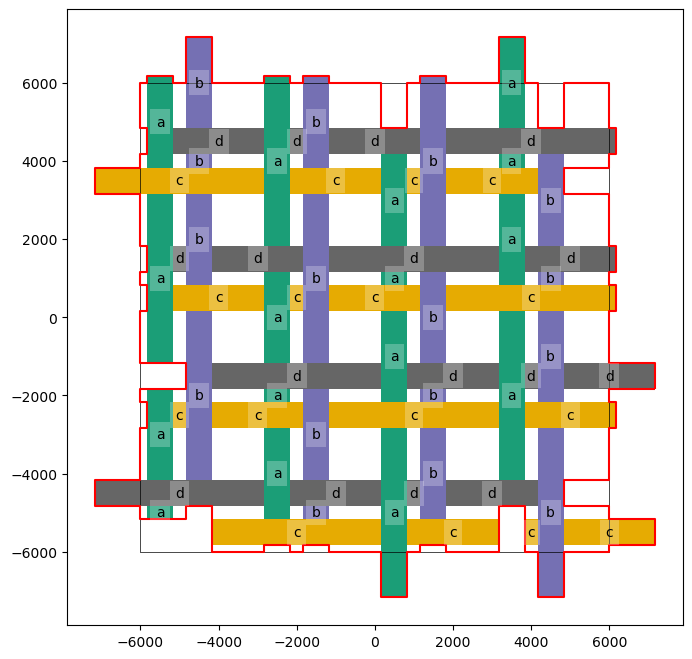

In [2]:
t = WeaveUnit(weave_type = "twill", strands = "ab-|cd-", aspect = 2/3)
t.plot()

In [4]:
[p for p in t.tiles.geometry]

[<POLYGON ((-5833.333 -5166.667, -5833.333 -4833.333, -5166.667 -4833.333, -5...>,
 <POLYGON ((-2166.667 -5166.667, -2833.333 -5166.667, -2833.333 -2833.333, -2...>,
 <POLYGON ((-5166.667 -1833.333, -5166.667 -4166.667, -5833.333 -4166.667, -5...>,
 <POLYGON ((-2166.667 -2166.667, -2833.333 -2166.667, -2833.333 -1833.333, -2...>,
 <POLYGON ((-5166.667 -1166.667, -5833.333 -1166.667, -5833.333 3166.667, -51...>,
 <POLYGON ((166.667 166.667, 833.333 166.667, 833.333 -2166.667, 166.667 -216...>,
 <POLYGON ((-2833.333 1166.667, -2166.667 1166.667, -2166.667 -1166.667, -283...>,
 <POLYGON ((833.333 1166.667, 833.333 833.333, 166.667 833.333, 166.667 1166....>,
 <POLYGON ((833.333 1833.333, 166.667 1833.333, 166.667 4166.667, 833.333 416...>,
 <POLYGON ((3833.333 -4166.667, 3166.667 -4166.667, 3166.667 166.667, 3833.33...>,
 <POLYGON ((3833.333 833.333, 3166.667 833.333, 3166.667 3166.667, 3833.333 3...>,
 <POLYGON ((3833.333 3833.333, 3166.667 3833.333, 3166.667 4166.667, 3833.333...>,
 <PO

In [7]:
t = TileUnit(tiling_type = "cairo")
t.tiles.geometry.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

/opt/miniconda3/envs/weaving/lib/python3.12/site-packages/shapely/constructive.py:996: RuntimeWarning: divide by zero encountered in oriented_envelope
  return lib.oriented_envelope(geometry, **kwargs)
/opt/miniconda3/envs/weaving/lib/python3.12/site-packages/shapely/constructive.py:996: RuntimeWarning: divide by zero encountered in oriented_envelope
  return lib.oriented_envelope(geometry, **kwargs)
/opt/miniconda3/envs/weaving/lib/python3.12/site-packages/shapely/constructive.py:996: RuntimeWarning: divide by zero encountered in oriented_envelope
  return lib.oriented_envelope(geometry, **kwargs)


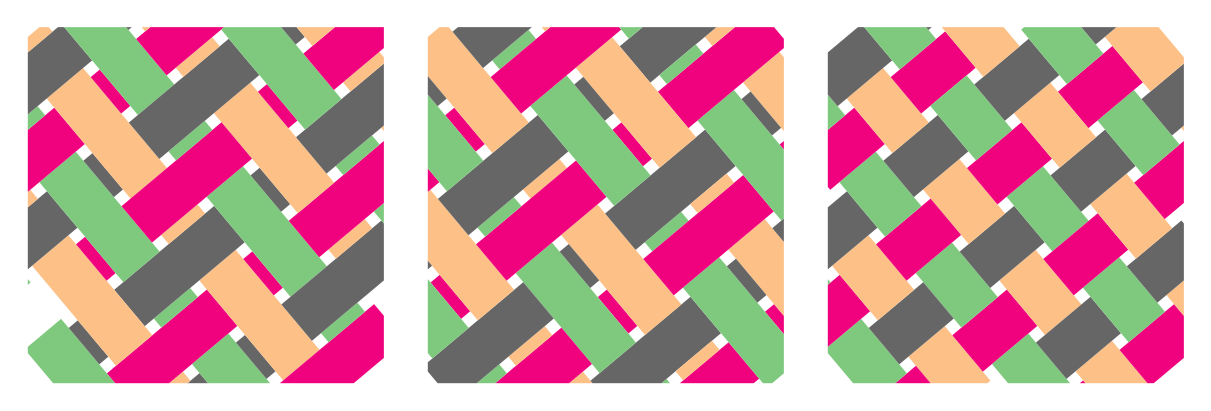

In [3]:
region = gpd.GeoDataFrame({"geometry": gpd.GeoSeries([shapely.geometry.Polygon([(-3000, -3000), (-3000, 3000), (3000, 3000), (3000, -3000)])])}, crs = 3857)
t1 = WeaveUnit(weave_type="twill", strands = "ab|cd", aspect = 0.8).transform_rotate(40)
tm1 = Tiling(t1, region).get_tiled_map(ragged_edges = False)
t2 = WeaveUnit(weave_type="basket", strands = "ab|cd", aspect = 0.8).transform_rotate(40)
tm2 = Tiling(t2, region).get_tiled_map(ragged_edges = False)
t3 = WeaveUnit(strands = "ab|cd", aspect = 0.8).transform_rotate(40)
tm3 = Tiling(t3, region).get_tiled_map(ragged_edges = False)

fig, axs = plt.subplots(ncols=3, nrows=1, figsize = (12, 4), constrained_layout=True)
# fig()
tm1.map.plot(ax = axs[0], column = "tile_id", cmap="Accent")
tm2.map.plot(ax = axs[1], column = "tile_id", cmap="Accent")
tm3.map.plot(ax = axs[2], column = "tile_id", cmap="Accent")
for ax in axs: ax.set_axis_off()

In [4]:
t1.get_local_patch(r = 2, include_0 = True).plot()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
t = WeaveUnit(weave_type = "cube", strands = "abc|def|ghi", aspect = 3/4, spacing = 250)

In [ ]:
# t = TileUnit(tiling_type = "cross", code = "4.8.8", n = 5, offset = 0) \
#     # .inset_prototile(0)
t = [WeaveUnit(weave_type = "cube", strands = "abc|def|ghi", aspect = a, spacing = 250) for a in np.linspace(0.7,0.8,51)]
# t.plot(r = 0, show_vectors = False, show_ids = False, show_prototile = False, show_reg_prototile = True)

# Scratch pad
A barebones notebook for testing basic operations of the package. The above code loads necessary libraries and allows for making a map.

In [ ]:
# ak = gpd.read_file("data/imd-auckland-2018.gpkg")

In [ ]:
# tile = TileUnit(tiling_type="square-colouring", 
#                 code="3.3.4.3.4", 
#                 spacing=500, 
#                 n=8, 
#                 crs=ak.crs) \
#                   .inset_prototile(10).inset_tiles(0)
# tile.plot(r=1)


In [ ]:
# n = tile.tiles.shape[0]
# vars = dict(zip(list("abcdefghijkl")[:n], [x for x in ak.columns if "Rank" in x][:n]))
# cmaps = dict(zip(vars.values(), ["Reds", "Oranges", "Greens", "Blues", 
#                                  "Purples", "Greys", "YlOrBr", "PuRd", 
#                                  "YlOrRd", "BuGn", "BuPu", "YlGnBu" ][:n]))
# tiling = Tiling(tile, ak)
# map = tiling.get_tiled_map()
# fig = map.render(variables=vars, colourmaps=cmaps, use_ellipse=True)